In [102]:
import os
os.chdir("E:")

In [103]:
os.getcwd()

'E:\\'

In [104]:
#Load libraries
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform


ModuleNotFoundError: No module named 'fancyimpute'

In [105]:
import pandas as pd
day=pd.read_csv("day.csv", sep=',')

In [106]:
day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
day.shape

(731, 16)

In [11]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [59]:
type(day)

pandas.core.frame.DataFrame

In [60]:
day['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [61]:
day['season'].nunique()

4

In [62]:
day['season']=day['season'].astype(object)

In [63]:
day['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [64]:
day['weathersit'].nunique()

3

In [65]:
day['weathersit']=day['weathersit'].astype(object)

In [66]:
day['yr'].unique()

array([0, 1], dtype=int64)

In [67]:
day['yr']=day['yr'].astype(object)

In [68]:
day['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [69]:
day['mnth']=day['mnth'].astype(object)

In [70]:
day['holiday'].unique()

array([0, 1], dtype=int64)

In [71]:
day['holiday']=day['holiday'].astype(object)

In [73]:
day['weekday']=day['weekday'].astype(object)

In [74]:
day['workingday'].unique()

array([0, 1], dtype=int64)

In [75]:
day['workingday']=day['workingday'].astype(object)

In [76]:
day['weathersit'].unique()

array([2, 1, 3], dtype=object)

In [ ]:
#Explarotory Data Analysis

In [ ]:
#Missing Value Analysis

In [77]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(day.isnull().sum())

In [78]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


{'whiskers': [<matplotlib.lines.Line2D at 0x10db410d128>,
 'caps': [<matplotlib.lines.Line2D at 0x10db410d9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x10db40faf98>],
 'medians': [<matplotlib.lines.Line2D at 0x10db411a278>],
 'fliers': [<matplotlib.lines.Line2D at 0x10db411a6a0>],
 'means': []}

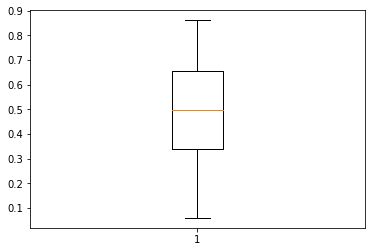

In [32]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(day['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10db4197c18>,
 'caps': [<matplotlib.lines.Line2D at 0x10db41a0518>,
 'boxes': [<matplotlib.lines.Line2D at 0x10db4197ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x10db41a0d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x10db41a91d0>],
 'means': []}

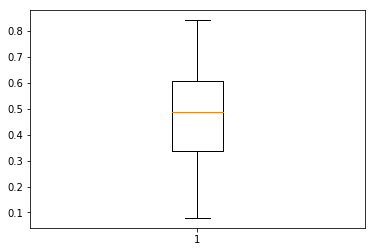

In [33]:
plt.boxplot(day['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10db4201208>,
 'caps': [<matplotlib.lines.Line2D at 0x10db4201ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x10db42010b8>],
 'medians': [<matplotlib.lines.Line2D at 0x10db420a358>],
 'fliers': [<matplotlib.lines.Line2D at 0x10db420a780>],
 'means': []}

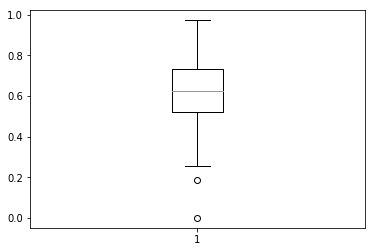

In [34]:
plt.boxplot(day['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10db4259b00>,
 'caps': [<matplotlib.lines.Line2D at 0x10db4261400>,
 'boxes': [<matplotlib.lines.Line2D at 0x10db42599b0>],
 'medians': [<matplotlib.lines.Line2D at 0x10db4261c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x10db426b0b8>],
 'means': []}

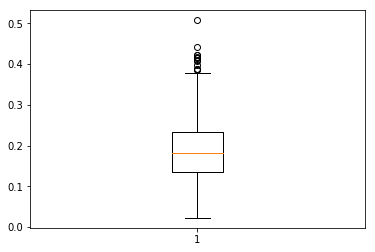

In [35]:
plt.boxplot(day['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10db42b0eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x10db42b87b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x10db42b0d68>],
 'medians': [<matplotlib.lines.Line2D at 0x10db42c2048>],
 'fliers': [<matplotlib.lines.Line2D at 0x10db42c2470>],
 'means': []}

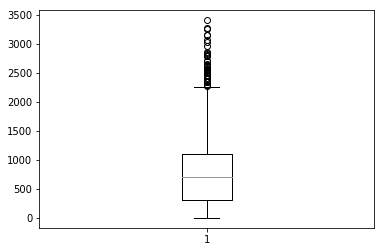

In [36]:
plt.boxplot(day['casual'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10db430fcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x10db43185c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10db430fb70>],
 'medians': [<matplotlib.lines.Line2D at 0x10db4318e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x10db4321278>],
 'means': []}

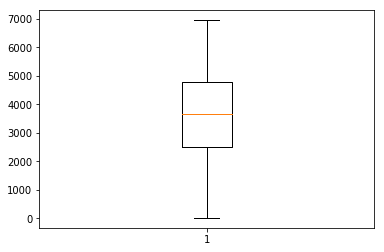

In [37]:
plt.boxplot(day['registered'])

In [38]:
#There are only hum,windspeed and casual variable which are having outliers

In [39]:
#For hum
#Actual value = 0.3010
#Mean = 0.19038
#Median = 0.18
#KNN = 0.25

In [40]:
#For windspeed  
#Actual value[13]=0.30100
#mean=0.19038
#median=0.18
#KNN = 0.25

In [41]:
#For casual  
#Actual value[3]=120
#mean=849.174
#median=717
#KNN = 93.59666

In [42]:
#Detect and replace with NA
# #Extract quartiles
iqr = q75 - q25

# #Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

# #Replace with NA
for i in range(len(day)):
    if((day['hum'].iloc[i]>maximum) | (day['hum'].iloc[i]<minimum)):
        day['hum'].iloc[i] = np.nan

# #Calculate missing value
missing_val = pd.DataFrame(day.isnull().sum())

# #Impute with KNN
marketing_train = pd.DataFrame(KNN(k = 3).complete(marketing_train), columns = marketing_train.columns)

C:\Users\Ashish Kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
#Detect and replace with NA
# #Extract quartiles
q75, q25 = np.percentile(day['windspeed'], [75 ,25])

# #Calculate IQR
iqr = q75 - q25

# #Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

# #Replace with NA
for i in range(len(day)):
    if((day['windspeed'].iloc[i]>maximum) | (day['windspeed'].iloc[i]<minimum)):
        day['windspeed'].iloc[i] = np.nan

C:\Users\Ashish Kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
#Detect and replace with NA
# #Extract quartiles
q75, q25 = np.percentile(day['casual'], [75 ,25])

# #Calculate IQR
iqr = q75 - q25

# #Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

# #Replace with NA
for i in range(len(day)):
    if((day['casual'].iloc[i]>maximum) | (day['casual'].iloc[i]<minimum)):
        day['casual'].iloc[i] = np.nan

C:\Users\Ashish Kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
# #Calculate missing value
missing_val = pd.DataFrame(day.isnull().sum())

In [47]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [49]:

# #Impute with KNN
day = pd.DataFrame(KNN(K = 3).complete(day), columns = day.columns)

AttributeError: 'KNeighborsClassifier' object has no attribute 'complete'

In [ ]:
#Feature Selection

In [79]:
cnames = ["instant","temp","atemp","hum","windspeed","casual","registered","cnt"]

In [80]:
##Correlation analysis
#Correlation plot
df_corr = day.loc[:,cnames]

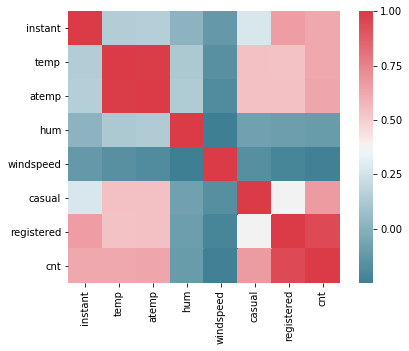

In [81]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [82]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["dteday","yr","mnth","weathersit","season","workingday","holiday","weekday"]

In [83]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(day['cnt'], day[i]))
    print(p)

dteday
0.24500455359481763
yr
0.367724209978971
mnth
0.49177634472851
weathersit
0.6407439686474243
season
0.5440596338517547
workingday
0.45435914436398794
holiday
0.6781463865579803
weekday
0.4102128310764939


In [84]:
day = day.drop(['yr','mnth','season','weekday','atemp','hum'], axis=1)

In [85]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [86]:
#Divide data into train and test
train, test = train_test_split(day, test_size=0.2)

In [ ]:
train = train.drop(['instant','dteday'])

In [ ]:
test1 = test

In [ ]:
test = test.drop(['instant','dteday'])

In [87]:
train.head(5)

,holiday,workingday,weathersit,temp,windspeed,casual,registered,cnt
605,0,1,1,0.728333,0.190925,935,6105,7040
447,0,1,2,0.601667,0.116300,2469,5893,8362
723,0,1,2,0.231304,0.077230,174,746,920
411,0,1,2,0.316667,0.091425,74,2931,3005
572,0,1,1,0.776667,0.284813,1036,5825,6861


In [ ]:
#Decision Tree

In [88]:
# ## Decision Tree

# In[ ]:


#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:7], train.iloc[:,7])

In [89]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:7])

In [ ]:
#Error Metric

In [90]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test.iloc[:,7], predictions_DT)

16.910177653039167

In [ ]:
#Multiple Regression

In [91]:
#Import libraries ofr LR
import statsmodels.api as sm

In [94]:
#Train the model using the train sets
model=sm.OLS(train.iloc[:,7],train.iloc[:,0:7]).fit()

In [95]:
#Print Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.757e+32
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:23:34   Log-Likelihood:                 14889.
No. Observations:                 584   AIC:                        -2.976e+04
Df Residuals:                     577   BIC:                        -2.973e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -1.648e-12   4.96e-13     -3.325      0.001   -2.62e-12   -6.75e-13
workingday -3.411e-13   2.96e-13     -1.152      0.250   -9.22e-13     2.4e-13
weathersit -8.242e-13   1.34e-13     -6.152      0.000   -1.09e-12   -5.61e-13
temp        1.705e-12   6.19e-13      2.757      0.006     4.9e-13    2.92e-12
windspeed   3.524e-12   9.63e-13      3.661      0.000    1.63e-12    5.41e-12
casual         1.0000   2.27e-16   4.41e+15      0.000       1.000       1.000
registered     1.0000   7.94e-17   1.26e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       13.585   Durbin-Watson:                   0.640
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.972
Skew:                           0.361   Prob(JB):                     0.000925
Kurtosis:                       2.771   Cond. No.                     4.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#Make the Predictions by the model
prediction_LR = model.predict(test.iloc[:,0:7])

In [97]:
#Calculate MAPE
MAPE(test.iloc[:,7],prediction_LR)

3.933721639986729e-14

In [ ]:
#Writing to the directory
sample = pd.DataFrame({"instant" = test1['instant'], "dteday" = test1['instant'], "cnt" = prediction_LR})

In [ ]:
# Writing a csv (output)
df_csv.to_csv("sample.csv", index = False)